In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df2=df

In [8]:
df2.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df2.isnull().sum() * 100 / len(df2)    # % calculation of missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

If missing values % is greater than 70% in general case we remove/ dont consider that column in analysis
if missing values is of 0.2% we will remove rows bcoz very less values are NA
if missing value is 19% or equivallent we can deal it with three ways
1. replace NA values with mean
2. replace NA values with median
3. replace NA values with mode if data is categorical


In [10]:
df2['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df2['age'].max()

80.0

In [12]:
df2['age'].min()

0.42

In [13]:
df2['age'].mean()

29.69911764705882

In [14]:
# Replacing null values of age by mean of age
df2=df2['age'].fillna(df2['age'].mean())


In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
df['new_age']=df2
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_age          0
dtype: int64

In [18]:
df1=df.drop(['age'],axis=1)

In [19]:
df1.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [20]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_age          0
dtype: int64

In [21]:
df2=df1.drop(columns=['deck'])

In [22]:
df2.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,new_age
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0


In [23]:
df2['embark_town'].fillna(df2['embark_town'].mode()[0],inplace=True)

In [24]:
df2.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,new_age
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0


In [25]:
df3=df2.isna().sum()

In [26]:
df2['embarked'].fillna(df2['embarked'].mode()[0],inplace=True)

In [27]:
df2.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,new_age
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0


In [28]:
df2.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
new_age        0
dtype: int64

In [29]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
new_age         89
dtype: int64

# Steps for EDA and wrangling data
1. Import libraries
2. Import datasets
3. explore your data
   1. Information
   2. Datatypes
   3. Missing values
   4. Take sense of your data
4. Understanding variables
5. Relationship  between the variables (Heatmap,pairplot,correlation) 
6. Brainstorming
   1. Normalize (Tecniques: log etc..)
   2. Removing outliers
7. Tidy data, clean data
8. Ready for statistical analysis,ML,Dl

<AxesSubplot:>

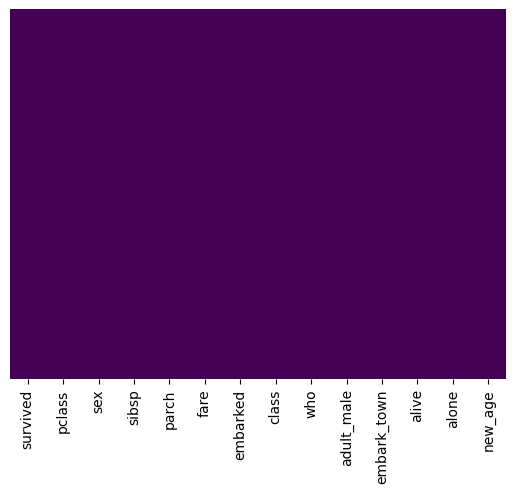

In [30]:
# visualize the nan value in heatmap
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

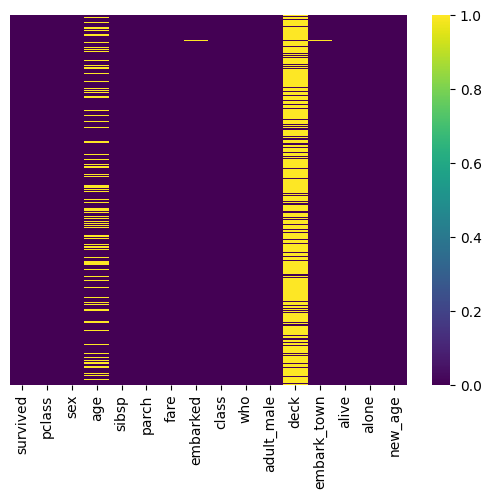

In [31]:
# visualize the nan value in heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

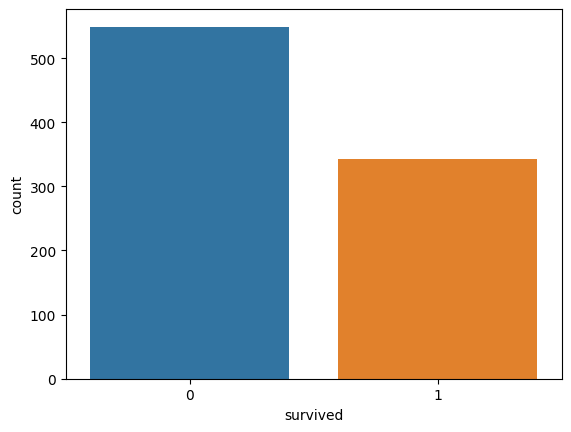

In [32]:
sns.countplot(data=df,x='survived')

C:\Users\aryannijhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

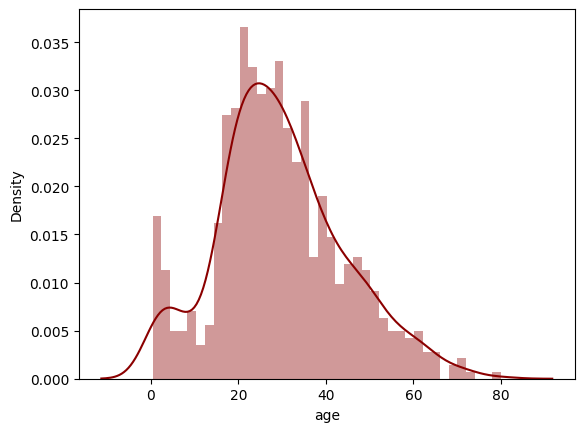

In [33]:
#data distribution
sns.distplot(df['age'].dropna(),kde=True,color='darkred',bins=40)

<AxesSubplot:xlabel='age', ylabel='Count'>

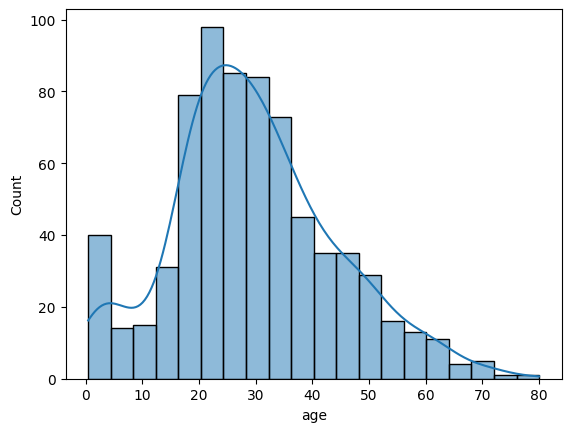

In [34]:
sns.histplot(x='age',data=df,kde=True)

<AxesSubplot:xlabel='survived', ylabel='age'>

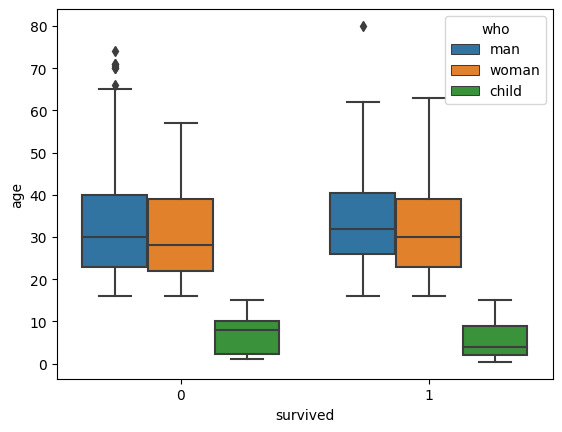

In [35]:
sns.boxplot(data=df,hue='who',x='survived',y='age')

(0.0, 300.0)

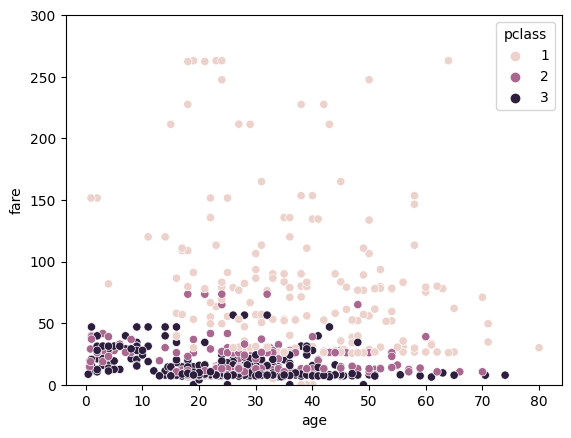

In [36]:
sns.scatterplot(x='age',y='fare',hue='pclass',data=df)
plt.ylim(0,300)

ValueError: object arrays are not supported

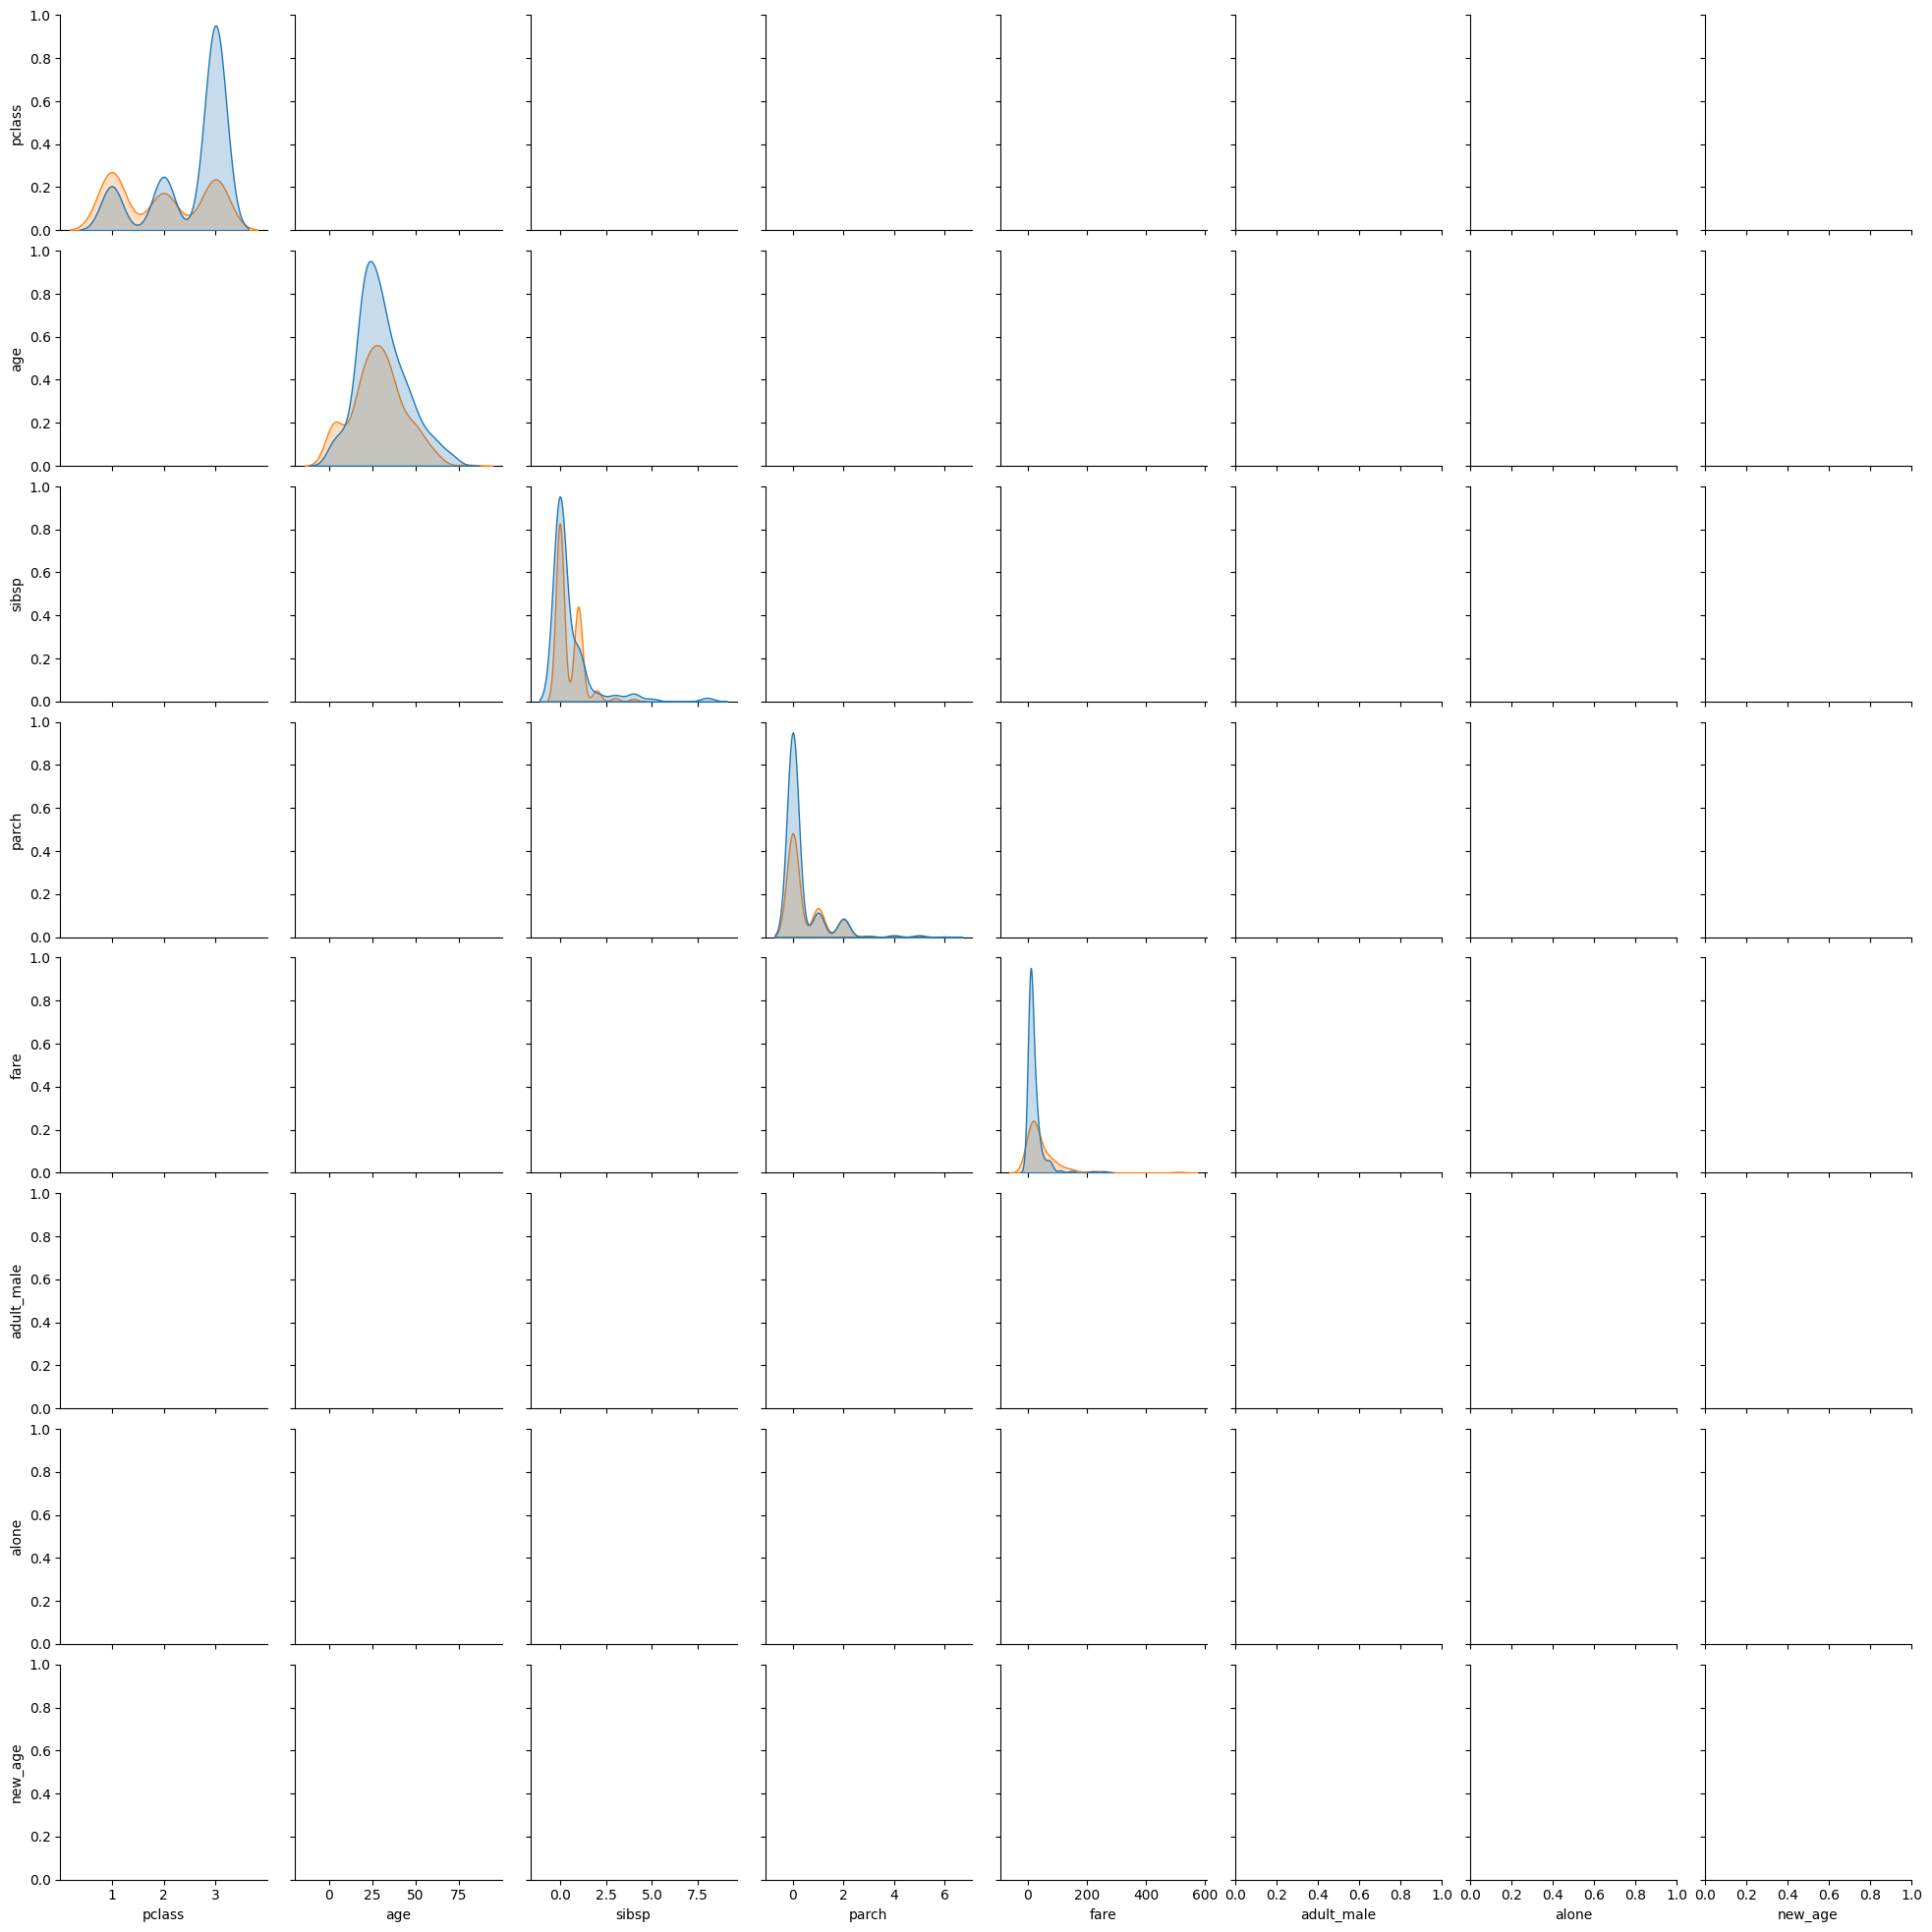

In [37]:
sns.pairplot(data=df,hue='survived')

<AxesSubplot:xlabel='pclass'>

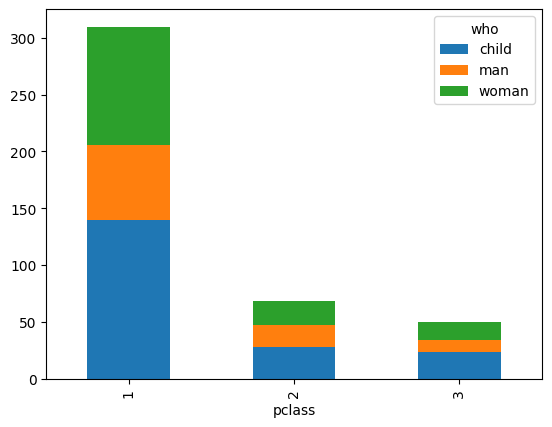

In [ ]:
# stacked barchart/plot
df.groupby(['pclass','who'])['fare'].mean().unstack().plot(kind='bar',stacked=True)

C:\Users\aryannijhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pclass', ylabel='age'>

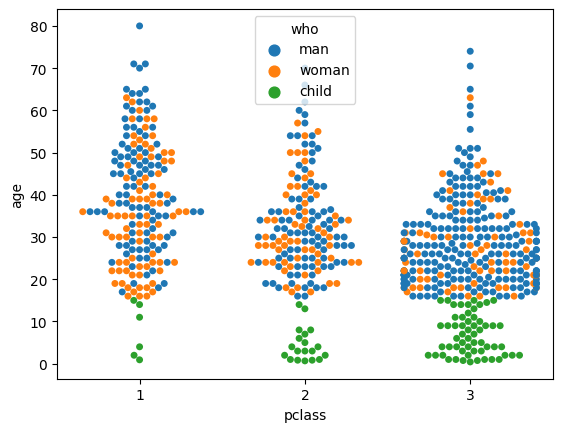

In [ ]:
# swarm plot
sns.swarmplot(x='pclass',y='age',hue='who',data=df)


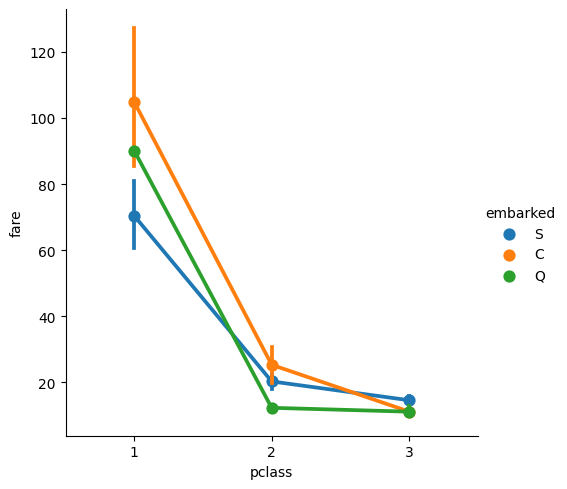

In [ ]:
sns.catplot(x='pclass',y='fare',hue='embarked',kind='point',data=df)

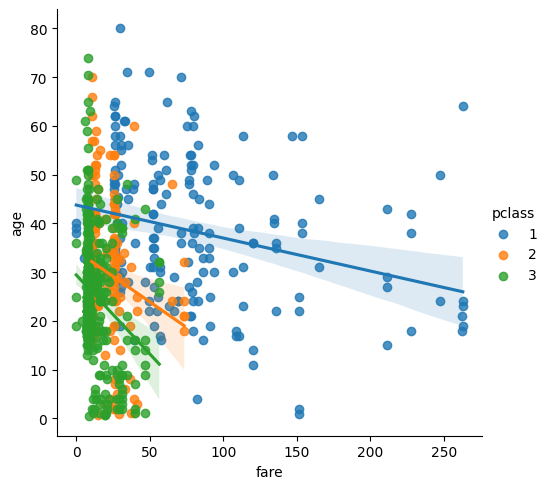

In [38]:
# relation of 2 numeric variable
sns.lmplot(data=df[df['fare']<300],x='fare',y='age',hue='pclass')

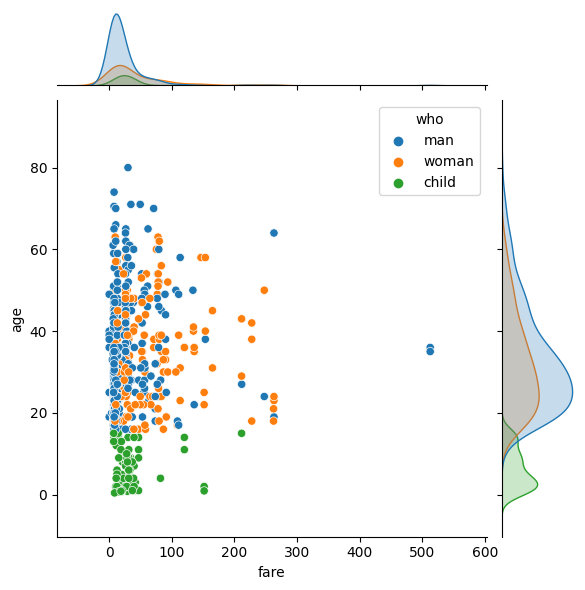

In [ ]:
sns.jointplot(data=df,x='fare',y='age',hue='who')

In [ ]:
df['age_group']=pd.cut(df['age'],[0,10,18,30,50,80],labels=['kids','child','youth','middle_age','old'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,youth
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,youth
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,middle_age


<AxesSubplot:xlabel='age_group'>

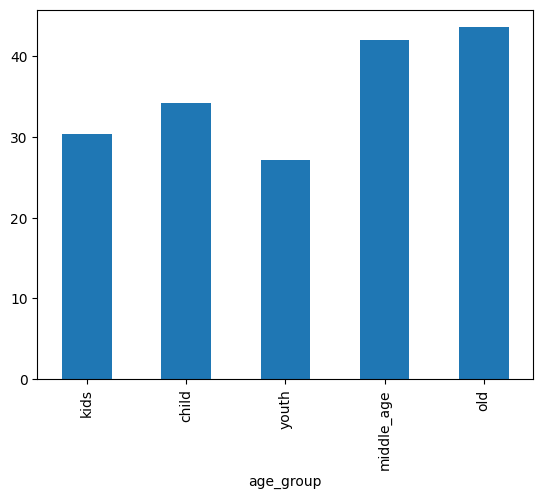

In [ ]:
df.groupby(["age_group"])['fare'].mean().plot(kind="bar")